<a href="https://colab.research.google.com/github/jpandersen61/SQLLiteNotebooks/blob/main/Establishing_a_relational_database_HotelDB_SQLLite.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Establishing a relational database

###ER-Diagram

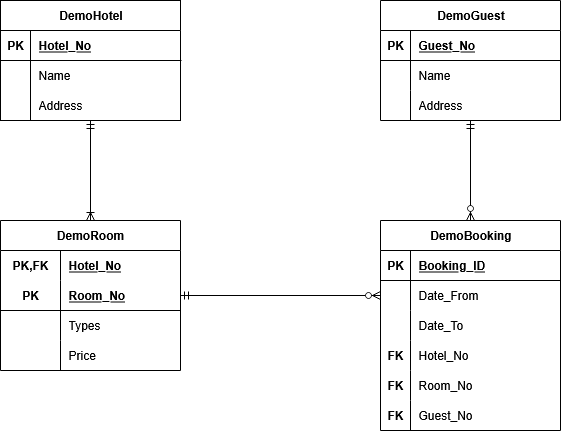

###Importing needed modules

In [1]:
import pandas as pd
import sqlite3

###Connecting to the database

I denne notebook benyttes [SQLite](https://sqlite.org/) databasen, der som det antydes er 'light', men som alligevel er OK til vores formål her, hvilket er at demonstrere, hvordan en database oprettes med SQL.

In [2]:
#Get connection to the hotel data - initially get an empty one
SQLiteConnetion = sqlite3.connect('hotel.db')

In [3]:
# create cursor object
SQLiteCursor = SQLiteConnetion.cursor()

###Drop eksisterende tabeller

Nedenstående SQL script bliver udført for at "rydde" databasen

In [4]:
SQLDropTableScript = """
DROP TABLE IF EXISTS DemoBooking;
DROP TABLE IF EXISTS DemoRoom;
DROP TABLE IF EXISTS DemoHotel;
DROP TABLE IF EXISTS DemoGuest;
"""

In [5]:
SQLiteCursor.executescript(SQLDropTableScript)

###Etabler Hotel tabel

I nedentående trin oprettes DemoHotel tabellen med test data:


*   [CREATE TABLE](https://https://www.w3schools.com/sql/sql_create_table.asp) definerer og opretter tabellen. Tabellens felter/attributter bliver oprettet som henholdsvis heltal (`int` for integer) og tekst, hvor vi har indført begrænsninger på henholdsvis 30 (`Name`) og 50 (`Address`) på tekstlængderne. Definitionen af sådanne [SQL datatyper](https://www.w3schools.com/sql/sql_datatypes.asp) varierer lidt fra system til system. Dvs. at hvis man står over for at skulle oprette en database til drift, så skal man være kritisk mht. til datatypernes egenskaber: Størrelser mv. Sålænge der er tale om noget til demo-formål som denne notebook, betyder det knapt så meget. `Hotel_No` er [PRIMARY KEY](https://www.w3schools.com/sql/sql_primarykey.ASP) i tabellen. Ved at specificere felterne som [NOT NULL](https://www.w3schools.com/sql/sql_notnull.asp) kræver vi, at disse skal indeholde en værdi i databasen.
*   [INSERT INTO](https://www.w3schools.com/sql/sql_insert.asp) indsætter nogle værdier i tabellen.


*   [SELECT...FROM](https://www.w3schools.com/sql/sql_select.asp) udtrækker her alle data i tabellen.





In [6]:
#Define CREATE TABLE statement for DemoHotel
SQLCreateTableHotel = """
CREATE TABLE DemoHotel(
    Hotel_No int NOT NULL PRIMARY KEY,
    Name VARCHAR(30) NOT NULL,
    Address VARCHAR(50) NOT NULL
)
"""


In [7]:
#Run CREATE TABLE statement in SQLite
SQLiteCursor.execute(SQLCreateTableHotel)

In [8]:
#Define INSERT INTO statement for DemoHotel
SQLInsertIntoHotel = """
INSERT INTO DemoHotel (Hotel_No, Name, Address)
VALUES
(1,'The Pope','Vaticanstreet 1 1111 Bishopcity'),
(2,'Lucky Star','Lucky Road 12 2222 Hometown'),
(3,'Discount','Inexpensive Road 7 3333 Cheaptown'),
(4,'deLuxeCapital','Luxury Road 99 4444 Luxus'),
(5,'Discount','Inexpensive Street 12 6666 Pricetown'),
(6,'Prindsen','Algade 5, 4000 Roskilde'),
(7,'Scandic','Sdr. Ringvej 5, 4000 Roskilde')
"""


In [9]:
#Run INSERT INTO statement in SQLite
SQLiteCursor.execute(SQLInsertIntoHotel)

In [10]:
#Define SELECT...FROM statement for extacting all data from the DemoHotel tabel
SQLSelectAllFromHotel = """
SELECT * FROM DemoHotel
"""

In [11]:
#Get DataFrame with DemoHotel data by applying the SELECT...FROM statement on the SQLiteConnetion
DataFrameSelectAllFromHotel = pd.read_sql(SQLSelectAllFromHotel, SQLiteConnetion)

#Display DataFrame
DataFrameSelectAllFromHotel

,Hotel_No,Name,Address
0,1,The Pope,Vaticanstreet 1 1111 Bishopcity
1,2,Lucky Star,Lucky Road 12 2222 Hometown
2,3,Discount,Inexpensive Road 7 3333 Cheaptown
3,4,deLuxeCapital,Luxury Road 99 4444 Luxus
4,5,Discount,Inexpensive Street 12 6666 Pricetown
5,6,Prindsen,"Algade 5, 4000 Roskilde"
6,7,Scandic,"Sdr. Ringvej 5, 4000 Roskilde"


###Etabler Room tabel

I nedentående trin oprettes DemoRoom tabellen med test data:


*   [CREATE TABLE](https://https://www.w3schools.com/sql/sql_create_table.asp) definerer og opretter tabellen. Tabellens felter/attributter bliver oprettet som henholdsvis heltal (`int` for integer), kommatal (`FLOAT`) og et enkelt karakter felt (`char(1)`). Sidstnævnte bruges til at angive værelsestypen: `'D'` for dobbeltværelse, `'F'` for familieværelse, `'S'` for enkeltværelse og `NULL` for udefineret. Definitionen af sådanne [SQL datatyper](https://www.w3schools.com/sql/sql_datatypes.asp) varierer som nævnt lidt fra system til system. Læg mærke til, at der er [CONSTRAINT...CHECK](https://www.w3schools.com/sql/sql_check.asp) på pris og type. Databasen vil da melde fejl, hvis man forsøger at gemme værdier, det ikke overholder det speficiserede `CHECK`.  Læg også mærke til, at `Types` er speciferet med en [DEFAULT](https://www.w3schools.com/sql/sql_default.asp) værdi, således at det pågældende værelse altid være registreret som et enkeltværelse, hvis der ikke angives andet.  `Hotel_No` og `Room_No` udgør tilsammen en sammensat primærnøgle eller [composite primary key](https://www.geeksforgeeks.org/sql/composite-key-in-sql/), hvilket er angivet med `Primary KEY (Room_No, Hotel_No)`. `Hotel_No` er [FOREIGN KEY](https://www.w3schools.com/sql/sql_foreignkey.asp) i tabellen, hvilket implementerer relationen DemoHotel og DemoRoom til mellem, som det er vist i det ovenstående ER-Diagram.   
*   [INSERT INTO](https://www.w3schools.com/sql/sql_insert.asp) indsætter nogle værdier i tabellen.


*   [SELECT...FROM](https://www.w3schools.com/sql/sql_select.asp) udtrækker her alle data i tabellen.

In [12]:
#Define CREATE TABLE statement for DemoRoom
SQLCreateTableRoom = """
CREATE TABLE DemoRoom(
    Room_No int NOT NULL,
    Hotel_No int NOT NULL,
    Types CHAR(1) DEFAULT 'S',
    Price FLOAT,
    CONSTRAINT checkType CHECK (Types IN ('D','F','S') OR Types IS NULL),
    CONSTRAINT checkPrice CHECK (price BETWEEN 0 AND 9999),
    FOREIGN KEY (Hotel_No) REFERENCES DemoHotel (Hotel_No),
    Primary KEY (Room_No, Hotel_No)
)
"""

In [13]:
#Run CREATE TABLE statement in SQLite
SQLiteCursor.execute(SQLCreateTableRoom)

In [14]:
#Define INSERT INTO statement for DemoRoom
SQLInsertIntoRoom = """
INSERT INTO DemoRoom (Room_No, Hotel_No, Types, Price)
VALUES
( 2,1,'D',200),
( 3,1,'D',200),
( 4,1,'D',200),
(11,1,'S',150),
(12,1,'S',150),
(13,1,'S',150),
(21,1,'F',220),
(22,1,'F',220),
(23,1,'F',220),
( 1,2,'D',230),
( 2,2,'D',230),
( 3,2,'D',230),
( 4,2,'D',230),
(11,2,'S',180),
(12,2,'S',180),
(21,2,'F',300),
(22,2,'F',300),
(1,3,'D',175),
( 2,3,'D',180),
(11,3,'S',100),
(21,3,'S',100),
(31,3,'F',200),
(32,3,'F',230),
( 1,4,'D',500),
( 2,4,'D',550),
( 3,4,'D',550),
(11,4,'S',350),
(12,4,'S',360),
( 1,5,'D',250),
(2,5,'D',170),
(11,5,'S',150),
(21,5,'F',300),
(22,5,'F',310),
(23,5,'F',320),
(24,5,'F',320),
( 1,6,'D',290),
(11,6,'S',185),
(21,6,'F',360),
(22,6,'F',370),
(23,6,'F',380),
(24,6,'F',380),
( 1,7,'D',200),
( 2,7,'D',200),
( 3,7,'D',200),
( 4,7,'D',200),
(11,7,'S',150),
(12,7,'S',150),
(13,7,'S',150),
(14,7,'S',150),
(21,7,'F',220),
(22,7,'F',220),
(23,7,'F',220),
(24,7,'F',220)
"""

In [15]:
#Run INSERT INTO statement in SQLite
SQLiteCursor.execute(SQLInsertIntoRoom)

In [16]:
#Define SELECT...FROM statement for extacting all data from the DemoRoom tabel
SQLSelectAllFromRoom = """
SELECT * FROM DemoRoom
"""

In [17]:
#Get DataFrame with DemoRoom data by applying the SELECT...FROM statement on the SQLiteConnetion
DataFrameSelectAllFromRoom = pd.read_sql_query(SQLSelectAllFromRoom, SQLiteConnetion)

#Display DataFrame
DataFrameSelectAllFromRoom

,Room_No,Hotel_No,Types,Price
0,2,1,D,200.0
1,3,1,D,200.0
2,4,1,D,200.0
3,11,1,S,150.0
4,12,1,S,150.0
5,13,1,S,150.0
6,21,1,F,220.0
7,22,1,F,220.0
8,23,1,F,220.0
9,1,2,D,230.0


###Etabler Guest tabel

I nedentående trin oprettes DemoGuest tabellen med test data:


*   [CREATE TABLE](https://https://www.w3schools.com/sql/sql_create_table.asp) definerer og opretter tabellen, som har den samme struktur som DemoHotel tabellen
*   [INSERT INTO](https://www.w3schools.com/sql/sql_insert.asp) indsætter nogle værdier i tabellen.
*   [SELECT...FROM](https://www.w3schools.com/sql/sql_select.asp) udtrækker her alle data i tabellen.




In [18]:
#Define CREATE TABLE statement for DemoGuest
SQLCreateTableGuest = """
CREATE TABLE DemoGuest (
    Guest_No int NOT NULL PRIMARY KEY,
    Name VARCHAR(30) NOT NULL,
    Address VARCHAR(50) NOT NULL
);
"""

In [19]:
#Run CREATE TABLE statement in SQLite
SQLiteCursor.execute(SQLCreateTableGuest)

In [20]:
#Define INSERT INTO statement for DemoGuest
SQLInsertIntoGuest = """
INSERT INTO DemoGuest (Guest_No, Name, Address)
VALUES
( 1,'Eva' ,'Paradisvej 3, 1111 Bispeborg'),
( 2,'Adam' ,'Paradisvej 7, 1111 Bispeborg'),
( 3,'Goeg' ,'Sunset Blvd. 8, 2222 Hjemby'),
( 4,'Gokke' ,'Sunset Blvd. 8, 2222 Hjemby'),
( 5,'Fy' ,'Klovnevej 87, 3333 Lilleby'),
( 6,'Bi' ,'Bredgade 198, 3333 Lilleby'),
( 7,'Romeo' ,'Kaerlighedstunellen 1, 4444 Borgerslev'),
( 8,'Julie' ,'Kaerlighedstunellen 2, 4444 Borgerslev'),
( 9,'Godzilla','Dommervænget 16A, 4000 Roskilde'),
(10,'KingKong','Hyrdevænget 38, 4000 Roskilde'),
(11,'KongHans','Algade 10, 4000 Roskilde'),
(12,'Hans' ,'Vikingevej 45, 4000 Roskilde'),
(13,'Poul' ,'Domkirkevej 12, 4000 Roskilde'),
(14,'Erik' ,'Hestetorvet 8, 4000 Roskilde'),
(15,'Ulla' ,'Stændertorvet 4, 4000 Roskilde'),
(16,'Yrsa' ,'Sdr. Ringvej 21, 4000 Roskilde'),
(17,'Yvonne' ,'Østre Ringvej 12, 4000 Roskilde'),
(18,'Tim' ,'Ringstedgade 33, 4000 Roskilde'),
(19,'Sten' ,'Ringstedvej 23, 4000 Roskilde'),
(20,'Erland' ,'Skovbovængets alle 3, 4000 Roskilde'),
(21,'Erwin' ,'Ternevej 17, 4000 Roskilde'),
(22,'Åge' ,'Solsortevej 9, 4000 Roskilde'),
(23,'Åse' ,'Gyvelvej 45, 4000 Roskilde'),
(24,'Frede' ,'Københavnsvej 25, 4000 Roskilde'),
(25,'Palle' ,'Sct Ohlsgade 10, 4000 Roskilde'),
(26,'Jørn' ,'Dronning Amaliesvej 22, 4000 Roskilde'),
(27,'Stefan' ,'Lærkevej 65, 4000 Roskilde'),
(28,'John' ,'By03ken 56, 4000 Roskilde'),
(29,'Dana' ,'Byageren 12, 4000 Roskilde'),
(30,'Arn' ,'Vindingevej 23, 4000 Roskilde')
"""

In [21]:
#Run INSERT INTO statement in SQLite
SQLiteCursor.execute(SQLInsertIntoGuest)

In [22]:
#Define SELECT...FROM statement for extacting all data from the DemoGuest tabel
SQLSelectAllFromGuest = """
SELECT * FROM DemoGuest
"""

In [23]:
#Get DataFrame with DemoGuest data by applying the SELECT...FROM statement on the SQLiteConnetion
DataFrameSelectAllFromGuest = pd.read_sql_query(SQLSelectAllFromGuest, SQLiteConnetion)

#Display DataFrame
DataFrameSelectAllFromGuest

,Guest_No,Name,Address
0,1,Eva,"Paradisvej 3, 1111 Bispeborg"
1,2,Adam,"Paradisvej 7, 1111 Bispeborg"
2,3,Goeg,"Sunset Blvd. 8, 2222 Hjemby"
3,4,Gokke,"Sunset Blvd. 8, 2222 Hjemby"
4,5,Fy,"Klovnevej 87, 3333 Lilleby"
5,6,Bi,"Bredgade 198, 3333 Lilleby"
6,7,Romeo,"Kaerlighedstunellen 1, 4444 Borgerslev"
7,8,Julie,"Kaerlighedstunellen 2, 4444 Borgerslev"
8,9,Godzilla,"Dommervænget 16A, 4000 Roskilde"
9,10,KingKong,"Hyrdevænget 38, 4000 Roskilde"


###Etabler Booking tabel

I nedentående trin oprettes DemoGuest tabellen med test data:


*   [CREATE TABLE](https://https://www.w3schools.com/sql/sql_create_table.asp) definerer og opretter tabellen. Tabellens felter/attributter bliver oprettet som henholdsvis heltal (`int`/`INTEGER`) og datoer (`DATE`). Definitionen af sådanne [SQL datatyper](https://www.w3schools.com/sql/sql_datatypes.asp) varierer lidt fra system til system. I denne tabel er der også indført [CONSTRAINT...CHECK](https://www.w3schools.com/sql/sql_check.asp) på datoer. `Hotel_No` og `Room_No` er [FOREIGN KEYs](https://www.w3schools.com/sql/sql_foreignkey.asp) i forhold til DemoRoom tabellen, hvilket implementerer relationen mellem DemoBooking og DemoRoom, som der er vist i det ovenstående ER-Diagram. På tilsvarende vis for `Guest_No` og DemoGuest tabellen. Primærnøglen `Booking_id` er [AUTOINCREMENT](https://www.tutorialspoint.com/sqlite/sqlite_using_autoincrement.htm), hvilket vil sige, at databasesystemet fortløbende tildeler værdier efterhånden som enkelte bookings registreres i datebasen.     
*   [INSERT INTO](https://www.w3schools.com/sql/sql_insert.asp) indsætter nogle værdier i tabellen.


*   [SELECT...FROM](https://www.w3schools.com/sql/sql_select.asp) udtrækker her alle data i tabellen.

In [24]:
#Define CREATE TABLE statement for DemoBooking
SQLCreateTableBooking = """
CREATE TABLE DemoBooking(
    Booking_id INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL,
    Hotel_No int NOT NULL,
    Guest_No int NOT NULL,
    Date_From DATE NOT NULL,
    Date_To DATE NOT NULL,
    Room_No int NOT NULL,
    CONSTRAINT incorrect_dates CHECK ((Date_To > Date_From) AND (Date_From <= '2018-04-04')),
    FOREIGN KEY(Guest_No) REFERENCES DemoGuest(Guest_No),
    FOREIGN KEY(Room_No, Hotel_No) REFERENCES DemoRoom(Room_No, Hotel_No)
)
"""

In [25]:
#Run CREATE TABLE statement in SQLite
SQLiteCursor.execute(SQLCreateTableBooking)

In [26]:
#Define INSERT INTO statement for DemoBooking
SQLInsertIntoBooking = """
INSERT INTO DemoBooking (Hotel_No, Guest_No, Date_From, Date_To, Room_No)
VALUES
(1, 4,'2011-02-02','2011-02-06',11),
(1, 3,'2011-04-04','2011-04-06',22),
(2, 3,'2011-03-18','2011-03-22',11),
(3, 1,'2011-05-22','2011-05-28',31),
(3,10,'2011-02-04','2011-02-12',21),
(4, 2,'2011-02-02','2011-02-06', 3),
(4, 2,'2011-04-20','2011-04-24', 3),
(4, 7,'2011-04-19','2011-04-24', 2),
(4, 8,'2011-02-28','2011-03-05',12),
(4, 6,'2011-04-11','2011-04-12',11),
(5, 2,'2011-02-02','2011-02-06',11),
(5, 2,'2011-04-11','2011-04-14',21),
(5, 7,'2011-04-16','2011-04-21', 2),
(6, 8,'2011-02-28','2011-03-03',22),
(6, 5,'2011-03-07','2011-03-10', 1),
(6, 6,'2011-04-02','2011-04-06',11),
(6,12,'2011-02-02','2011-02-07',21),
(6,13,'2011-02-04','2011-02-08',22),
(6,14,'2011-02-05','2011-02-09',23),
(6,21,'2011-02-06','2011-02-10',1),
(6,22,'2011-02-07','2011-02-11',11),
(6,23,'2011-02-08','2011-02-12',21),
(6,26,'2011-02-09','2011-02-13',22),
(6,27,'2011-02-10','2011-02-14',23),
(6,30,'2011-02-11','2011-02-15',24),
(6,15,'2011-02-12','2011-02-16',1),
(6,16,'2011-02-13','2011-02-17',11),
(6,17,'2011-02-14','2011-02-18',21),
(7, 1,'2011-02-02','2011-02-06',1),
(7, 2,'2011-02-03','2011-02-07',2),
(7, 3,'2011-02-04','2011-02-08',3),
(7, 4,'2011-02-05','2011-02-09',4),
(7, 5,'2011-02-07','2011-02-11',11),
(7, 6,'2011-02-08','2011-02-12',21),
(7, 7,'2011-02-09','2011-02-13',22),
(7, 8,'2011-02-10','2011-02-14',23),
(7, 9,'2011-02-11','2011-02-15',24),
(7,10,'2011-02-12','2011-02-16',1),
(7,11,'2011-02-13','2011-02-17',11),
(7,12,'2011-02-14','2011-02-18',21),
(7,13,'2011-02-15','2011-02-16',1),
(7,14,'2011-02-16','2011-02-17',2),
(7,15,'2011-02-17','2011-02-18',3),
(7,16,'2011-02-18','2011-02-19',4),
(7,17,'2011-02-19','2011-02-20',11),
(7,18,'2011-02-20','2011-02-21',21),
(7,19,'2011-02-21','2011-02-22',22),
(7,20,'2011-02-22','2011-02-23',23),
(7,21,'2011-02-23','2011-02-24',24),
(7,22,'2011-02-24','2011-02-25',1),
(7,23,'2011-02-25','2011-02-26',11),
(7,24,'2011-02-26','2011-02-28',21),
(7,25,'2011-02-26','2011-02-28',1),
(7,26,'2011-02-27','2011-02-28',2),
(7,27,'2011-02-28','2011-03-01',3),
(7,28,'2011-02-28','2011-03-02',4)
"""

In [27]:
#Run INSERT INTO statement in SQLite
SQLiteCursor.execute(SQLInsertIntoBooking)

In [28]:
#Define SELECT...FROM statement for extacting all data from the DemoBooking tabel
SQLSelectAllFromBooking = """
SELECT * FROM DemoBooking
"""

In [29]:
#Get DataFrame with DemoBooking data by applying the SELECT...FROM statement on the SQLiteConnetion
DataFrameSelectAllFromBooking = pd.read_sql_query(SQLSelectAllFromBooking, SQLiteConnetion)

#Display DataFrame
DataFrameSelectAllFromBooking

,Booking_id,Hotel_No,Guest_No,Date_From,Date_To,Room_No
0,1,1,4,2011-02-02,2011-02-06,11
1,2,1,3,2011-04-04,2011-04-06,22
2,3,2,3,2011-03-18,2011-03-22,11
3,4,3,1,2011-05-22,2011-05-28,31
4,5,3,10,2011-02-04,2011-02-12,21
5,6,4,2,2011-02-02,2011-02-06,3
6,7,4,2,2011-04-20,2011-04-24,3
7,8,4,7,2011-04-19,2011-04-24,2
8,9,4,8,2011-02-28,2011-03-05,12
9,10,4,6,2011-04-11,2011-04-12,11


###Joining tables

Reference:  https://www.w3schools.com/sql/sql_join.asp

In [30]:
SQLSelectJoinHotelRoom = """
SELECT DemoHotel.Hotel_No, DemoHotel.Name, DemoRoom.Room_No
FROM DemoRoom
INNER JOIN DemoHotel ON DemoRoom.Hotel_No=DemoHotel.Hotel_No
ORDER BY DemoHotel.Hotel_No, DemoRoom.Room_No
"""




In [31]:
DataFrameSelectJoinHotelRoom = pd.read_sql(SQLSelectJoinHotelRoom, SQLiteConnetion)
DataFrameSelectJoinHotelRoom

,Hotel_No,Name,Room_No
0,1,The Pope,2
1,1,The Pope,3
2,1,The Pope,4
3,1,The Pope,11
4,1,The Pope,12
5,1,The Pope,13
6,1,The Pope,21
7,1,The Pope,22
8,1,The Pope,23
9,2,Lucky Star,1
